In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

sns.set(style='darkgrid')

**1.1**

In [2]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])

In [5]:
def vect_1(X):
    d = np.diag(X)
    p = np.prod(d[d != 0])
    
    return p

vect_1(X)

3

**1.2**

In [7]:
def loop_1(X):  
    d = [X[i, j] for i in range(X.shape[0]) for j in range(X.shape[1]) if i == j and X[i, j] != 0]
    p = d[0]
    
    for i in range(1, len(d)):
        p *= d[i]

    return p

loop_1(X)

3

**1.3**

In [8]:
def oth_1(X):
    d = np.diag(X)[np.diag(X) != 0]
    p = d[0]
    
    for i in range(1, len(d)):
        p *= d[i]

    return p

oth_1(X)

3

In [38]:
%timeit vect_1(np.random.randn(100, 100))
%timeit loop_1(np.random.randn(100, 100))
%timeit oth_1(np.random.randn(100, 100))

487 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
781 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
515 µs ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [15]:
%timeit vect_1(np.random.randn(1000, 1000))
%timeit loop_1(np.random.randn(1000, 1000))
%timeit oth_1(np.random.randn(1000, 1000))

45.8 ms ± 717 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
77.9 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
46.1 ms ± 728 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit vect_1(np.random.randn(10000, 10000))
%timeit loop_1(np.random.randn(10000, 10000))
%timeit oth_1(np.random.randn(10000, 10000))

5.07 s ± 30.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.36 s ± 96.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.16 s ± 139 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


46.8 ms ± 314 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
191 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
429 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
773 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.37 s ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.89 s ± 38.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.66 s ± 90.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.37 s ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.28 s ± 37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
81.9 ms ± 622 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
331 ms ± 3.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
760 ms ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.34 s ± 22.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.21 s ± 30.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.18 s ± 59 ms per loop (mean ± std. dev. of

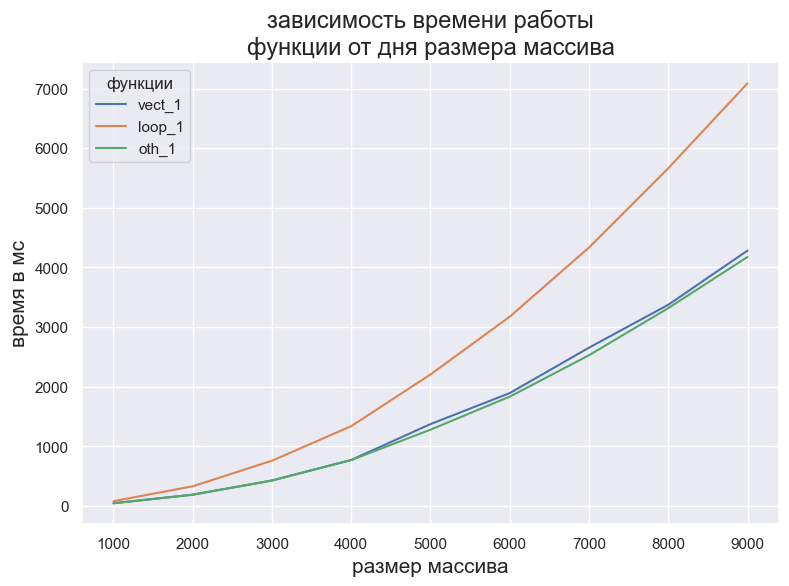

In [74]:
plt.figure(figsize = (9, 6))

plt.title('зависимость времени работы\nфункции от дня размера массива', fontsize=17)

plt.xlabel('размер массива', fontsize=15)
plt.ylabel('время в мс', fontsize=15)

size = np.arange(1000, 10000, 1000)

for f in [vect_1, loop_1, oth_1]:
    times = []

    for x in size:
        time = %timeit -o f(np.random.randn(x, x))
        times.append(time.average * 10 ** 3)

    plt.plot(size, times)

plt.legend(title='функции', labels=['vect_1', 'loop_1', 'oth_1'])

векторизованный вариант решения работает быстрее, так как *numpy* работает с массивами, которые содержат данные одного типа и располагаются в памяти последовательно, за счет этого массивы работают быстрее, чем списки.

**2.1**

In [5]:
x = np.array([2, 1, 2, 4])
y = np.array([4, 2, 1, 2])

In [16]:
def vect_2(x, y):
    if len(x) != len(y):
        return False

    return np.all(np.sort(x) == np.sort(y))

vect_2(x, y)

True

**2.2**

In [17]:
def loop_2(x, y):
    if len(x) != len(y):
        return False

    x.sort(), y.sort()

    for i in range(len(x)):
        if x[i] != y[i]:
            return False

    return True

loop_2(x, y)

True

**2.3**

In [43]:
def oth_2(x, y):
    if len(x) != len(y):
        return False
    
    x_set, x_count = np.unique(x, return_counts=True)
    y_set, y_count = np.unique(y, return_counts=True)

    if x_set.shape != y_set.shape or np.any(x_set != y_set) or np.any(x_count != y_count):
        return False
        
    return True

oth_2(x, x)

True

In [80]:
x = np.random.randint(0, 100, 100)
y = x.copy()

%timeit vect_2(x, y)
%timeit loop_2(x, y)
%timeit oth_2(x, y)

8.95 µs ± 68.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
26.2 µs ± 204 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
42.7 µs ± 216 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [81]:
x = np.random.randint(0, 100, 1000)
y = x.copy()

%timeit vect_2(x, y)
%timeit loop_2(x, y)
%timeit oth_2(x, y)

29 µs ± 465 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
268 µs ± 4.56 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
66.3 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [84]:
x = np.random.randint(0, 100, 10000)
y = x.copy()

%timeit vect_2(x, y)
%timeit loop_2(x, y)
%timeit oth_2(x, y)

240 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.83 ms ± 29.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
274 µs ± 5.48 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [86]:
x = np.random.randint(0, 100, 100000)
y = x.copy()

%timeit vect_2(x, y)
%timeit loop_2(x, y)
%timeit oth_2(x, y)

1.29 ms ± 57.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
25.8 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.21 ms ± 39.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


207 µs ± 3.96 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
338 µs ± 2.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
362 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
433 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
565 µs ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
673 µs ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
846 µs ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
857 µs ± 61.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.07 ms ± 31.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.08 ms ± 46.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.67 ms ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.13 ms ± 265 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.89 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.4 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 

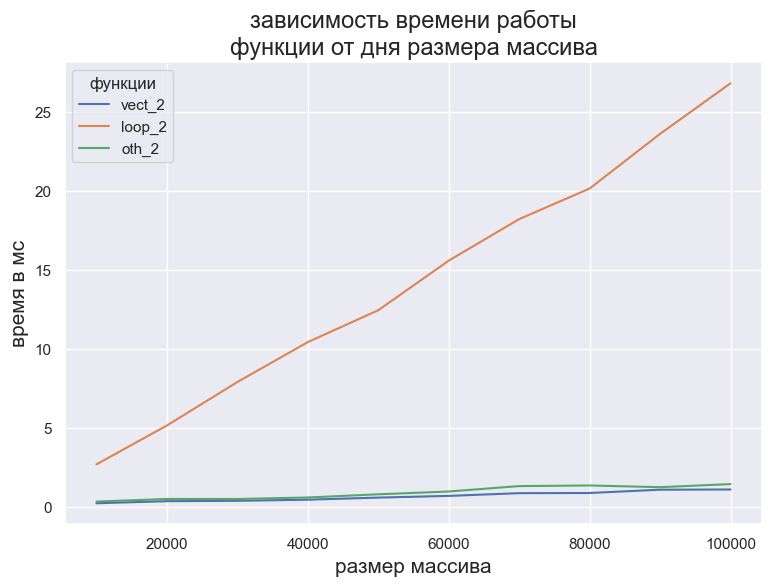

In [76]:
plt.figure(figsize = (9, 6))

plt.title('зависимость времени работы\nфункции от дня размера массива', fontsize=17)

plt.xlabel('размер массива', fontsize=15)
plt.ylabel('время в мс', fontsize=15)

size = np.arange(10000, 100001, 10000)

for f in [vect_2, loop_2, oth_2]:
    times = []

    for s in size:
        x = np.random.randint(0, 100, s)
        y = x.copy()
        time = %timeit -o f(x, y)
        times.append(time.average * 10 ** 3)

    plt.plot(size, times)

plt.legend(title='функции', labels=['vect_2', 'loop_2', 'oth_2'])

векторизованные варианты работают быстрее, чем решение с циклами. в 3 варианте решения не используется сортировка, из-за этого на больших данных он выигрывает по скорости у векторизованного варианта с сортировкой.

**3.1**

In [8]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

In [12]:
np.where(x[:-1] == 0)[0] + 1

array([3, 5, 6])

In [21]:
def vect_3(x):
    return np.max(x[np.where(x[:-1] == 0)[0] + 1])

vect_3(x)

5

**3.2**

In [22]:
def loop_3(x):
    l = []

    for i in range(1, len(x)):
        if x[i - 1] == 0:
            l.append(x[i])

    return max(l)

loop_3(x)

5

**3.3**

In [23]:
def oth_3(x):
    l = []

    for i in range(1, len(x)):
        if x[i - 1] == 0:
            l.append(x[i])

    return np.max(np.array(l))

oth_3(x)

5

In [131]:
x = np.hstack((np.random.randint(0, 100, 100), np.array([0])))

%timeit vect_3(x)
%timeit loop_3(x)
%timeit oth_3(x)

8.82 µs ± 56.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.1 µs ± 259 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
24.4 µs ± 2.79 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [132]:
x = np.hstack((np.random.randint(0, 100, 1000), np.array([0])))

%timeit vect_3(x)
%timeit loop_3(x)
%timeit oth_3(x)

10.5 µs ± 270 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
190 µs ± 8.23 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
194 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [133]:
x = np.hstack((np.random.randint(0, 100, 10000), np.array([0])))

%timeit vect_3(x)
%timeit loop_3(x)
%timeit oth_3(x)

20.2 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.97 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.9 ms ± 32.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [134]:
x = np.hstack((np.random.randint(0, 100, 100000), np.array([0])))

%timeit vect_3(x)
%timeit loop_3(x)
%timeit oth_3(x)

112 µs ± 6.85 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
19.4 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
18.9 ms ± 491 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


10.7 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
20.8 µs ± 636 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
30.8 µs ± 898 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
35.9 µs ± 478 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
51.1 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
61.1 µs ± 2.14 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
70.8 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
82.6 µs ± 4.07 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
97.3 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
104 µs ± 3.14 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
111 µs ± 4.34 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
174 µs ± 4.31 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.95 ms ± 51.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.69 ms ± 90.2 µs per loop (mean

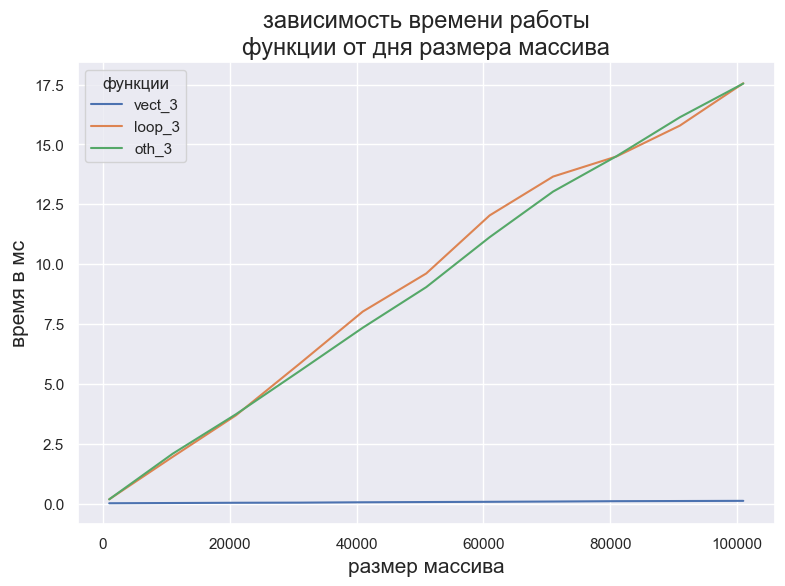

In [104]:
plt.figure(figsize = (9, 6))

plt.title('зависимость времени работы\nфункции от дня размера массива', fontsize=17)

plt.xlabel('размер массива', fontsize=15)
plt.ylabel('время в мс', fontsize=15)

size = np.arange(1000, 111000, 10000)

for f in [vect_3, loop_3, oth_3]:
    times = []

    for s in size:
        x = np.hstack((np.random.randint(0, 100, s), np.array([0])))
        time = %timeit -o f(x)
        times.append(time.average * 10 ** 3)

    plt.plot(size, times)

plt.legend(title='функции', labels=['vect_3', 'loop_3', 'oth_3'])

векторизованный вариант работает быстрее. вариант с встроенной функцией *max()* работает примерно также, как и функция, где используется *max* из модуля *numpy* (несмотря на преобразования списка в *numpy* массив), поэтому можно сделать вывод, что np.max() работает немного быстре, чем max().

**4.1**

In [13]:
from matplotlib.pyplot import imread, imshow

img = imread('/Users/egor/Downloads/image.png')

In [14]:
img.shape

(182, 277, 3)

In [25]:
def vect_4(img, coef):
    return np.sum(img * coef, axis=-1)

**4.2**

In [26]:
def loop_4(img, coef):
    new_img = []

    for h in range(len(img)):
        new_h = []
        for w in range(len(img[0])):
            s = 0
            for k in range(3):
                s += img[h, w, k] * coef[k]
            new_h.append(s)
            
        new_img.append(new_h)
    return new_img

**4.3**

In [27]:
def oth_4(img, coef):
    new_img = img * np.array([0.299, 0.587, 0.114])
    
    return [[np.sum(new_img[h, w]) for w in range(new_img.shape[1])] for h in range(new_img.shape[0])]

In [56]:
%timeit vect_4(img, np.array([0.299, 0.587, 0.114]))
%timeit loop_4(img, np.array([0.299, 0.587, 0.114]))
%timeit oth_4(img, np.array([0.299, 0.587, 0.114]))

1.49 ms ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
107 ms ± 9.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
229 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


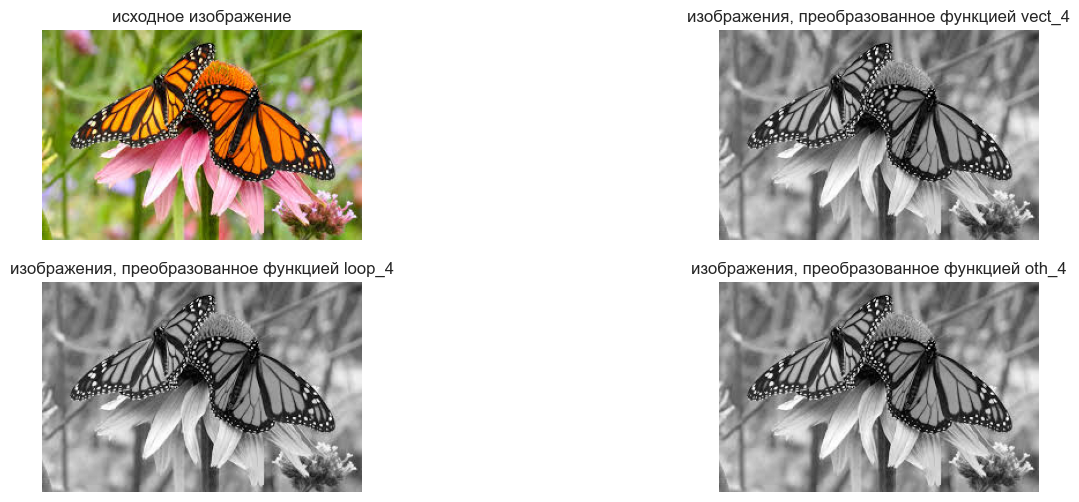

In [57]:
grey_img_v = vect_4(img, np.array([0.299, 0.587, 0.114]))
grey_img_l = loop_4(img, np.array([0.299, 0.587, 0.114]))
grey_img_o = oth_4(img, np.array([0.299, 0.587, 0.114]))

fig, axs = plt.subplots(figsize=(16, 6), ncols=2, nrows=2)

axs[0, 0].imshow(img)
axs[0, 0].set_title('исходное изображение')
axs[0, 0].axis('off')
axs[0, 1].imshow(grey_img_v, cmap='gray')
axs[0, 1].set_title('изображения, преобразованное функцией vect_4')
axs[0, 1].axis('off')
axs[1, 0].imshow(grey_img_l, cmap='gray')
axs[1, 0].set_title('изображения, преобразованное функцией loop_4')
axs[1, 0].axis('off')
axs[1, 1].imshow(grey_img_o, cmap='gray')
axs[1, 1].set_title('изображения, преобразованное функцией oth_4')
axs[1, 1].axis('off');

11.8 µs ± 412 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
37.6 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
90.3 µs ± 2.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
164 µs ± 3.85 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
265 µs ± 9.03 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
367 µs ± 3.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
502 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
709 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
845 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.09 ms ± 38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
204 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.8 ms ± 33.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.9 ms ± 96.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.74 ms ± 175 µs per loop (mean ± std. dev. of 

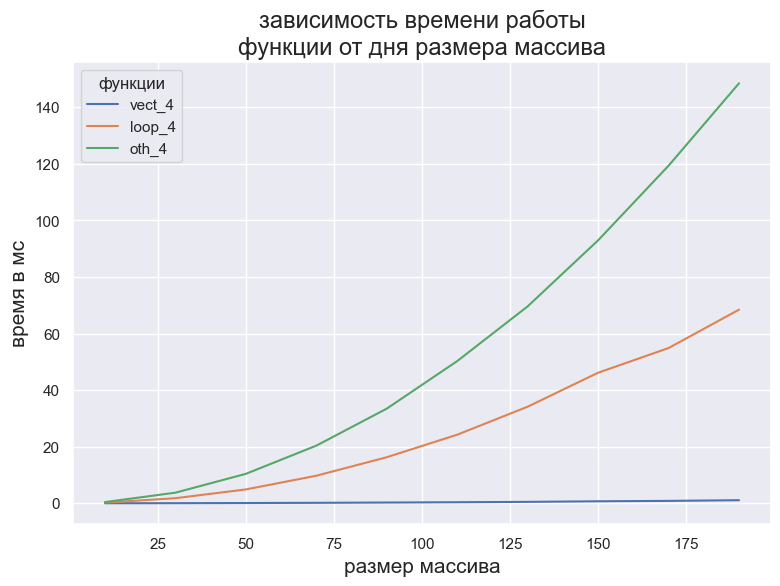

In [100]:
plt.figure(figsize = (9, 6))

plt.title('зависимость времени работы\nфункции от дня размера массива', fontsize=17)

plt.xlabel('размер массива', fontsize=15)
plt.ylabel('время в мс', fontsize=15)

size = np.arange(10, 200, 20)

for f in [vect_4, loop_4, oth_4]:
    times = []

    for s in size:
        img = np.random.randint(0, 100, (s, s, 3))
        time = %timeit -o f(img, np.array([0.299, 0.587, 0.114]))
        times.append(time.average * 10 ** 3)

    plt.plot(size, times)

plt.legend(title='функции', labels=['vect_4', 'loop_4', 'oth_4'])

векторизованное решение намного быстрее.

**5.1**

In [19]:
x = np.array([2, 2, 3, 3, 3, 5, 2, 2])
x_shift = np.hstack((np.zeros(1), x))
x_mask = x != x_shift[:-1]
np.where(x_mask)[0]
x.shape[0]

8

In [30]:
def vect_5(x):
    x_shift = np.hstack((np.zeros(1), x))
    x_mask = x != x_shift[:-1]
    
    idx = np.where(x_mask)[0]
    idx_shift = np.hstack((idx[1:], x.shape[0]))

    return x[x_mask], idx_shift - idx

vect_5(x)

(array([2, 3, 5, 2]), array([2, 3, 1, 2]))

**5.2**

In [31]:
def loop_5(x):
    num_list = [x[0]]
    count_list = []
    
    c = 1
    for i in range(1, len(x)):
        if x[i - 1] == x[i]:
            c += 1
        else:
            count_list.append(c)
            c = 1
            num_list.append(x[i])
            
    count_list.append(c)
    
    return num_list, count_list

loop_5(x)

([2, 3, 5, 2], [2, 3, 1, 2])

**5.3**

In [32]:
def oth_5(x):
    idx = np.hstack((np.where(x[:-1] != x[1:])[0], x.shape[0] - 1))
    idx_shift = np.hstack((-1, idx[:-1]))
    return x[idx], idx - idx_shift

oth_5(x)

(array([2, 3, 5, 2]), array([2, 3, 1, 2]))

In [84]:
x = np.random.randint(0, 100, 100)

%timeit vect_5(x)
%timeit loop_5(x)
%timeit oth_5(x)

13.2 µs ± 533 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
45 µs ± 895 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
12.5 µs ± 389 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [85]:
x = np.random.randint(0, 100, 1000)

%timeit vect_5(x)
%timeit loop_5(x)
%timeit oth_5(x)

18.7 µs ± 777 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
417 µs ± 2.55 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
17.2 µs ± 81.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [86]:
x = np.random.randint(0, 100, 10000)

%timeit vect_5(x)
%timeit loop_5(x)
%timeit oth_5(x)

68.3 µs ± 524 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.13 ms ± 44.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
62.3 µs ± 453 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


18.7 µs ± 420 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
21.9 µs ± 387 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
26.1 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
30.9 µs ± 409 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
41.5 µs ± 247 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
46.4 µs ± 594 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
51.5 µs ± 634 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
56.6 µs ± 792 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
64 µs ± 322 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
416 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
810 µs ± 3.27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.21 ms ± 3.41 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.62 ms ± 7.43 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.01 ms ± 16.8 µs per loop (mean ± std. dev

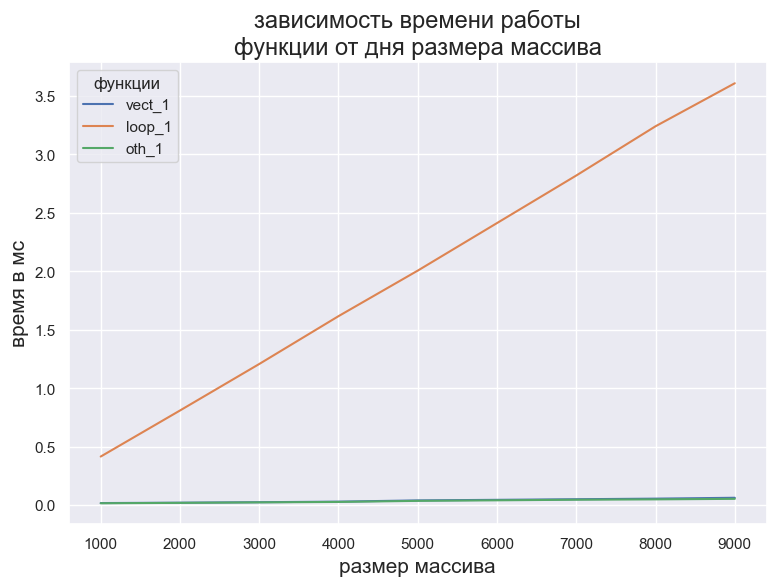

In [102]:
plt.figure(figsize = (9, 6))

plt.title('зависимость времени работы\nфункции от дня размера массива', fontsize=17)

plt.xlabel('размер массива', fontsize=15)
plt.ylabel('время в мс', fontsize=15)

size = np.arange(1000, 10000, 1000)

for f in [vect_5, loop_5, oth_5]:
    times = []

    for s in size:
        x = np.random.randint(0, 100, s)
        time = %timeit -o f(x)
        times.append(time.average * 10 ** 3)

    plt.plot(size, times)

plt.legend(title='функции', labels=['vect_1', 'loop_1', 'oth_1'])

векторизованное решение быстрее.